# Simulação: Pavel tentando adivinhar perguntas binárias (sim/não)
Neste notebook, vamos simular o desempenho de uma pessoa (Pavel) tentando adivinhar a resposta de perguntas binárias com probabilidade de acerto de 50%. Ou seja, cada tentativa tem chance de **50% de acerto** e **50% de erro**, como em um chute aleatório entre 'sim' ou 'não'.

### Etapas:
1. Simular uma única tentativa de Pavel
2. Somar o número de acertos em 25 tentativas
3. Repetir esse experimento milhares de vezes
4. Contabilizar quantas vezes ele acertou 0, 1, ..., 25 vezes
5. Representar os resultados graficamente

In [1]:
# Importação de bibliotecas
import numpy as np  # para gerar números aleatórios e cálculos vetoriais
import pandas as pd  # para tabular e organizar os resultados
import matplotlib.pyplot as plt  # para gerar os gráficos
import seaborn as sns  # para tornar os gráficos mais bonitos

## 1. Emulando uma única tentativa de Pavel
Vamos simular uma tentativa de adivinhação. Usamos `np.random.choice([0, 1])` para representar o resultado:
- 1 representa acerto
- 0 representa erro

In [2]:
# Uma tentativa (resultado aleatório: 0 ou 1)
np.random.choice([0, 1])

1

## 2. Simulando 25 tentativas seguidas e somando os acertos
Vamos simular 25 tentativas e somar quantos acertos Pavel teve:

In [3]:
# Simulando 25 tentativas
tentativas = np.random.choice([0, 1], size=25)
acertos = tentativas.sum()
print(f"Acertos em 25 tentativas: {acertos}")

Acertos em 25 tentativas: 11


## 3. Repetindo o experimento muitas vezes
Agora vamos repetir esse experimento **100.000 vezes** para entender o comportamento da distribuição de acertos.

In [4]:
# Simular 100.000 experimentos de 25 tentativas
n_simulacoes = 100_000
resultados = np.random.binomial(n=25, p=0.5, size=n_simulacoes)
resultados[:10]  # mostrar primeiros resultados

array([10,  9, 13, 13, 11, 14, 13,  8, 13, 11])

## 4. Contabilizando os resultados
Vamos contar quantas vezes Pavel acertou 0, 1, 2, ..., até 25 vezes. Em seguida, calculamos as frequências relativas (proporções):

In [5]:
# Frequências absolutas e relativas
frequencia = pd.Series(resultados).value_counts().sort_index()
tabela = pd.DataFrame({
    'Acertos': frequencia.index,
    'Frequência absoluta': frequencia.values,
    'Frequência relativa (%)': (frequencia.values / n_simulacoes * 100).round(2)
})
tabela

,Acertos,Frequência absoluta,Frequência relativa (%)
0,2,1,0.00
1,3,5,0.00
2,4,37,0.04
3,5,129,0.13
4,6,564,0.56
5,7,1460,1.46
6,8,3238,3.24
7,9,5966,5.97
8,10,9784,9.78
9,11,13181,13.18


## 5. Visualizando a distribuição
Vamos agora representar a distribuição de acertos com um gráfico de barras:

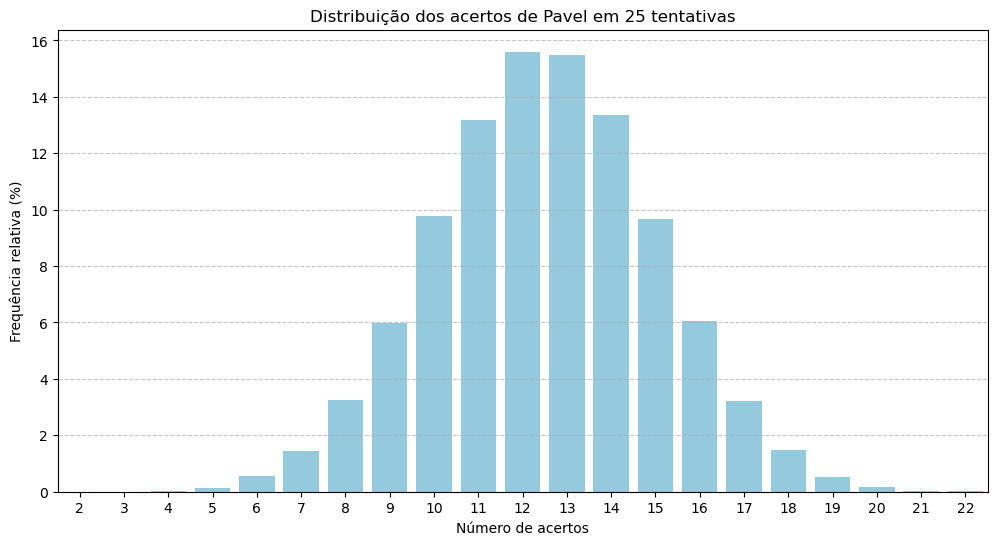

In [6]:
# Gráfico da distribuição
plt.figure(figsize=(12,6))
sns.barplot(data=tabela, x='Acertos', y='Frequência relativa (%)', color='skyblue')
plt.title('Distribuição dos acertos de Pavel em 25 tentativas')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Número de acertos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ✅ Conclusão:
- Como as chances de acerto são 50%, a maioria dos experimentos resultou em algo próximo de 12 ou 13 acertos.
- A distribuição é simétrica, como uma curva em forma de sino (distribuição binomial).
- Poucos experimentos resultaram em extremos como 0 ou 25 acertos.